# World Happines 2022 : Global, Regional, and Cluster Analysis 

This project is aimed to analyze the most important factors affecting the happiness score in different regional area of the world and to analyze whether there are countries from different region of the world which have similarities. The datasets involved in this project were taken from Kaggle.

### 1. Reading and Transforming The Datasets

Let us begin by importing necessary libraries and evaluating the columns of the datasets.

In [689]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

df_2022=pd.read_csv('2022.csv',decimal=',')
print('### General info of the dataset ###\n',)
df_2022.info()


### General info of the dataset ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 no

Some columns have redundant name and hence will be renamed.

In [690]:
df_2022.rename(columns={'RANK':'Rank',
                        'Dystopia (1.83) + residual':'Dystopia',
                        'Explained by: GDP per capita':'GDP per capita',
                        'Explained by: Social support':'Social support',
                        'Explained by: Healthy life expectancy':'Healthy life expectancy',
                        'Explained by: Freedom to make life choices':'Freedom to make life choices',
                        'Explained by: Generosity':'Generosity',
                        'Explained by: Perceptions of corruption':'Perceptions of corruption'},inplace=True)


The missing values found in the dataset apparently come from line 147 of the dataset in which all features of this line have NaN values.

In [691]:
print('### Content of line 147 ###\n')
print(df_2022.loc[146,:])


### Content of line 147 ###

Rank                            147
Country                          xx
Happiness score                 NaN
Whisker-high                    NaN
Whisker-low                     NaN
Dystopia                        NaN
GDP per capita                  NaN
Social support                  NaN
Healthy life expectancy         NaN
Freedom to make life choices    NaN
Generosity                      NaN
Perceptions of corruption       NaN
Name: 146, dtype: object


Therefore we can simply drop line 147 of the dataset, and additionally we will also drop the 'Whisker-high' and 'Whisker-low' features since those features are unnecessary for the current project.

In [692]:
df_2022.dropna(inplace=True)
df_2022.drop(['Whisker-high', 'Whisker-low'],axis=1,inplace=True)


'Regional information' does not exist in the data of year 2022, nevertheless it does exist in the data of year 2021. Therefore we can merge the two datasets to obtain the desired feature. However we must also note that such merging process can usually lead to the emergence of missing values.

In [693]:
df_2021=pd.read_csv('2021.csv')
df_2021.rename(columns={'Country name':'Country', 'Regional indicator':'Region'},inplace=True)
df=pd.merge(df_2022, df_2021[['Country','Region']],  on='Country', how='left')
Region=df.pop('Region')
df.insert(2,'Region',Region)
print('### Missing values due to merging process ###\n')
print(df.isna().sum())


### Missing values due to merging process ###

Rank                             0
Country                          0
Region                          23
Happiness score                  0
Dystopia                         0
GDP per capita                   0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Generosity                       0
Perceptions of corruption        0
dtype: int64


The missing values in the regional feature can be handled through the following mapping method.

In [694]:
df.loc[df['Region'].isna(),'Region']=df['Country'].map({'Luxembourg*':'Western Europe',
                                                         'Czechia':'Central and Eastern Europe',
                                                         'Guatemala*':'Latin America and Caribbean',
                                                         'Kuwait*':'Middle East and North Africa',
                                                         'Belarus*':'Central and Eastern Europe',
                                                         'Turkmenistan*':'Middle East and North Africa',
                                                         'North Cyprus*':'Middle East and North Africa',
                                                         'Libya*':'Middle East and North Africa',
                                                         'Azerbaijan*':'Middle East and North Africa',
                                                         'Gambia*':'Sub-Saharan Africa',
                                                         'Liberia*':'Sub-Saharan Africa',
                                                         'Congo':'Sub-Saharan Africa',
                                                         'Niger*':'Middle East and North Africa',
                                                         'Comoros*':'Sub-Saharan Africa',
                                                         'Palestinian Territories*':'Middle East and North Africa',
                                                         'Eswatini, Kingdom of*':'Sub-Saharan Africa',
                                                         'Madagascar*':'Sub-Saharan Africa',
                                                         'Chad*':'Middle East and North Africa',
                                                         'Yemen*':'Middle East and North Africa',
                                                         'Mauritania*':'Sub-Saharan Africa',
                                                         'Lesotho*':'Sub-Saharan Africa',
                                                         'Botswana*':'Sub-Saharan Africa',
                                                         'Rwanda*':'Sub-Saharan Africa'})


Additionally, we will also simplify the regional nomenclature and reassign some countries into regions that fit them better.

In [695]:
df['Region']=df['Region'].map({'Sub-Saharan Africa':'SSA',
                               'Latin America and Caribbean':'America',
                               'Middle East and North Africa':'MENA',
                               'South Asia':'Asia',
                               'Central and Eastern Europe':'Europe',
                               'Western Europe':'Europe',
                               'East Asia':'Asia',
                               'Southeast Asia':'Asia',
                               'North America and ANZ':'ANZ',
                               'Commonwealth of Independent States':'Commonwealth of Independent States'})

df.loc[df['Country'].isin(['Canada','United States']),'Region']='America'
df.loc[df['Country'].isin(['Kazakhstan','Uzbekistan','Kyrgyzstan',
                           'Armenia','Tajikistan','Georgia']),'Region']='MENA'
df.loc[df['Country'].isin(['Moldova','Russia','Ukraine']),'Region']='Europe'


The prerequisited process of the dataset has finished and thus we may proceed with analyzing the dataset.

### 2. Global Analysis

Let us firstly evaluate the global behavior of the happiness report in the year 2022. 

Number of Country: 146


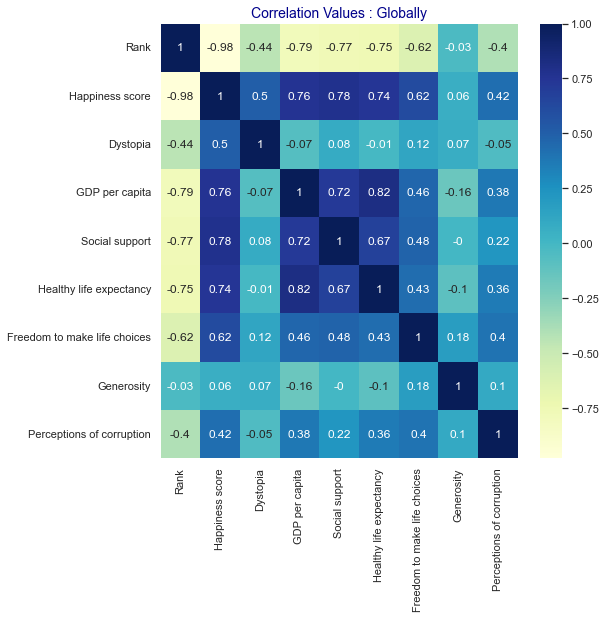

In [696]:
print('Number of Country:',df.shape[0])
plt.figure(figsize=(8,8))
sns.heatmap(round(df.corr(method='pearson'),2), annot=True, cmap='YlGnBu')
plt.title('Correlation Values : Globally', fontsize=14, color='darkblue')
plt.show()


From the 146 countries surveyed for the dataset, globally, there are 3 Most Important Features (MIF) that strongly affect the happiness
score for the year 2022 :
    1. Social support,
    2. GDP per capita, and
    3. Healthy life expectancy.
It can also be seen from the heatmap that 'GDP per capita' is strongly correlated with 'Healthy life expectancy'. This is understandable since countries with high 'GDP per capita' tend to have better health-supporting-systems. Meanwhile, the strong negative correlation between the 'Rank' feature and the 'Happiness score' feature is due to the fact that countries with higher 'Happiness score' will have higher rank in the World Happiness Report (note that high rank means smaller rank number, e.g. high rank=1 (small number), low rank=100 (big number)).

Now let us observe the mean MIF scores of the world in the year 2022.


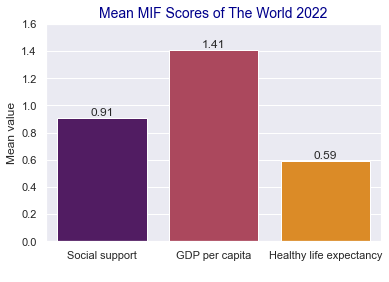

In [697]:
df_mean_global=df[['Social support','GDP per capita', 'Healthy life expectancy']].mean().reset_index()
df_mean_global.columns=['X','Y']
df_mean_global['Y']=round(df_mean_global['Y'],2)
ax=sns.barplot(data=df_mean_global, x='X', y='Y',palette='inferno')
plt.xlabel(' ')
plt.ylabel('Mean value')
plt.title('Mean MIF Scores of The World 2022',color='darkblue',fontsize=14)
plt.ylim(ymax=1.6)
for i in ax.containers:
    ax.bar_label(i)
plt.show()


It can be seen that, in the year 2022, the mean MIF scores of the world are 0.91 for 'Social support', 1.41 for 'GDP per capita', and 0.59 for 'Healthy life expectancy'.

It is then natural for us to observe the number of countries with MIF scores higher than the global average, and also the number of countries with MIF scores lower than the global average.

In [698]:
df_mean_higher_global=df[(df['Social support']>=df['Social support'].mean()) &
                             (df['GDP per capita']>=df['GDP per capita'].mean()) &
                             (df['Healthy life expectancy']>=df['Healthy life expectancy'].mean())]

df_mean_lower_global=df[(df['Social support']<=df['Social support'].mean()) &
                             (df['GDP per capita']<=df['GDP per capita'].mean()) &
                             (df['Healthy life expectancy']<=df['Healthy life expectancy'].mean())]

print('Number of countries with MIF scores higher than the global average :', df_mean_higher_global['Country'].nunique())
print('Number of countries with MIF scores lower  than the global average :', df_mean_lower_global['Country'].nunique())


Number of countries with MIF scores higher than the global average : 61
Number of countries with MIF scores lower  than the global average : 46


It turns out that there are 61 countries with MIF scores higher than the global average, and there are 46 countries with MIF scores lower than the global average.

The question now is this : For the 61 countries with higher MIF, is the mean happiness score of these countries higher than the global average? And for the 46 countries with lower MIF, is the mean happiness score for these countries lower than the global average?

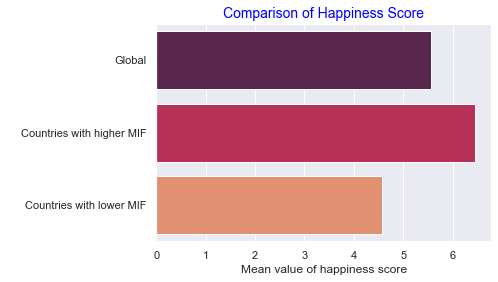

In [699]:
df_compare=pd.DataFrame([['Global',df['Happiness score'].mean()],
                         ['Countries with higher MIF',df_mean_higher_global['Happiness score'].mean()],
                         ['Countries with lower MIF',df_mean_lower_global['Happiness score'].mean()]],
                         columns=['splitter','values'])
sns.barplot(data=df_compare, x='values', y='splitter', palette='rocket')
plt.xlabel('Mean value of happiness score')
plt.ylabel(' ')
plt.title('Comparison of Happiness Score',color='blue',fontsize=14)
plt.show()


It turns out that the mean value of happiness score is higher than the global average for countries with higher MIF scores, and the mean value of happiness score is lower than the global average for countries with lower MIF scores. This result again signifies the role of MIF in determining the happiness score.


### 3. Regional Analysis

We will now continue with the regional analysis, starting from Asian region. 

Number of Country: 21


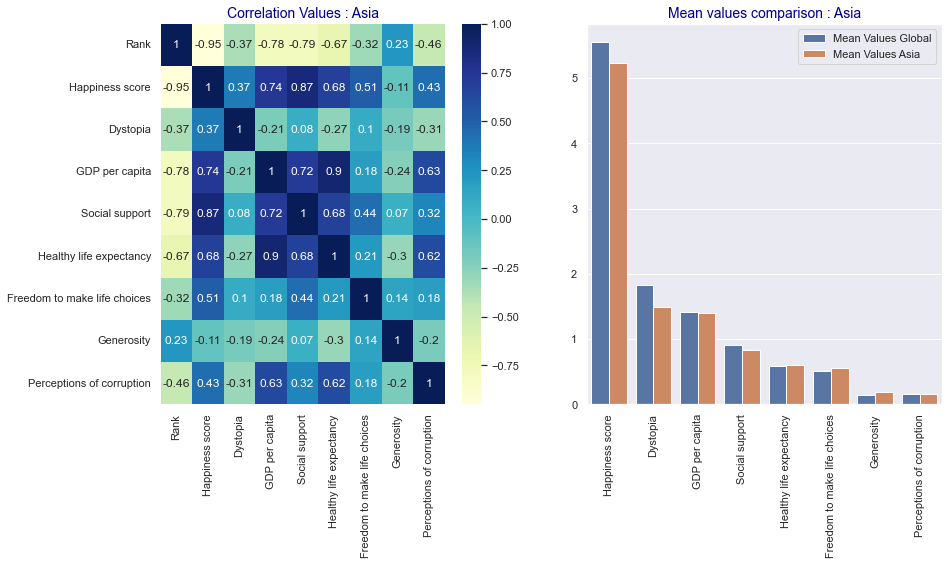

In [700]:
df_Asia=df[df['Region']=='Asia']

mean_df_global=df.drop('Rank',axis=1).mean(numeric_only=True)
mean_compare=pd.concat([mean_df_global,df_Asia.drop('Rank',axis=1).mean(numeric_only=True)],axis=1)\
               .set_axis(['Mean Values Global','Mean Values Asia'],axis=1).stack().reset_index()\
               .set_axis(['feature','splitter','values'],axis=1)

print('Number of Country:',df_Asia.shape[0])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.heatmap(round(df_Asia.corr(method='pearson'),2),annot=True,cmap='YlGnBu')
plt.title('Correlation Values : Asia',fontsize=14,color='darkblue')

plt.subplot(1,2,2)
sns.barplot(data=mean_compare, x='feature', y='values', hue='splitter')
plt.legend(title=None)
plt.xticks(rotation=90)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Mean values comparison : Asia',fontsize=14,color='darkblue')
plt.show()


In Asia, of the 21 countries surveyed, the main features affecting the happiness score are the same as the global MIF, i.e.: 1. Social support, 2. GDP per capita, and 3. Healthy life expectancy. We can see from the barplot that for this region the mean scores of 'GDP-per-capita' and 'Social support' are lower than the global average, while for 'Healthy life expectancy' the mean score is only slightly higher than the global average. The other features have mean scores only slightly higher, equal, or even lower than the global average. These facts may result in the low mean happiness score for Asian region as compared to the global average.

Next, let us evaluate the dataset for the region of Middle East and North Africa.

Number of Country: 28


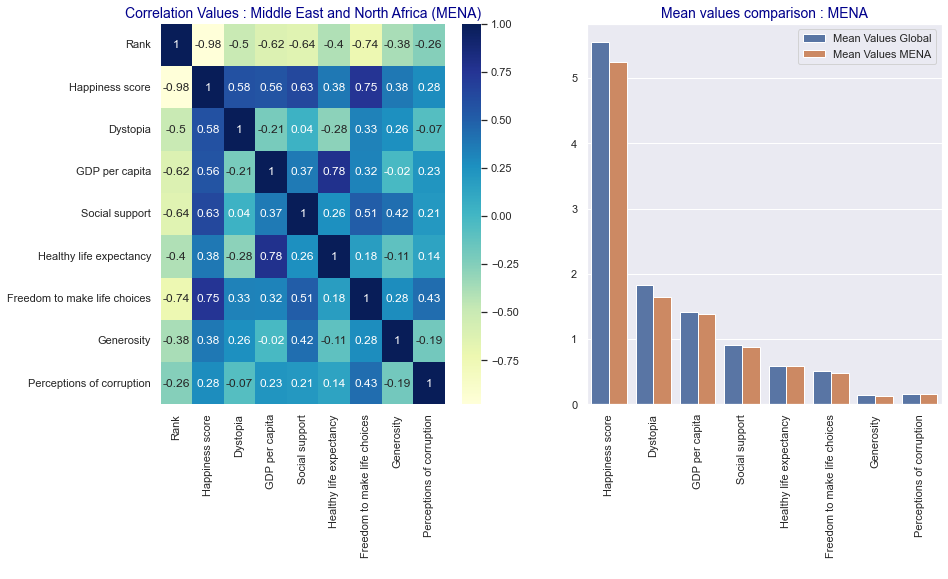

In [701]:
df_MENA=df[df['Region']=='MENA']

mean_compare=pd.concat([mean_df_global,df_MENA.drop('Rank',axis=1).mean(numeric_only=True)],axis=1)\
               .set_axis(['Mean Values Global','Mean Values MENA'],axis=1).stack().reset_index()\
               .set_axis(['feature','splitter','values'],axis=1)

print('Number of Country:',df_MENA.shape[0])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.heatmap(round(df_MENA.corr(method='pearson'),2),annot=True,cmap='YlGnBu')
plt.title('Correlation Values : Middle East and North Africa (MENA)',fontsize=14,color='darkblue')

plt.subplot(1,2,2)
sns.barplot(data=mean_compare, x='feature', y='values', hue='splitter')
plt.legend(title=None)
plt.xticks(rotation=90)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Mean values comparison : MENA',fontsize=14,color='darkblue')
plt.show()


In the Middle East and North African region the most important features that determine the happiness score are : 1. Freedom to make life choices, 2. Social support, and 3. Dystopia. All of these local MIF have mean scores below the global average. From the viewpoint of the global MIF, the mean scores of 'GDP per capita' and 'Healthy life expectancy' are also lower than the global average. Moreover, the rest of the features have mean scores only equal or even lower than the global average. These may result in the low mean happiness score as compared to the global average.

Next, we move on to the dataset for Sub-Sahara African region.

Number of Country: 33


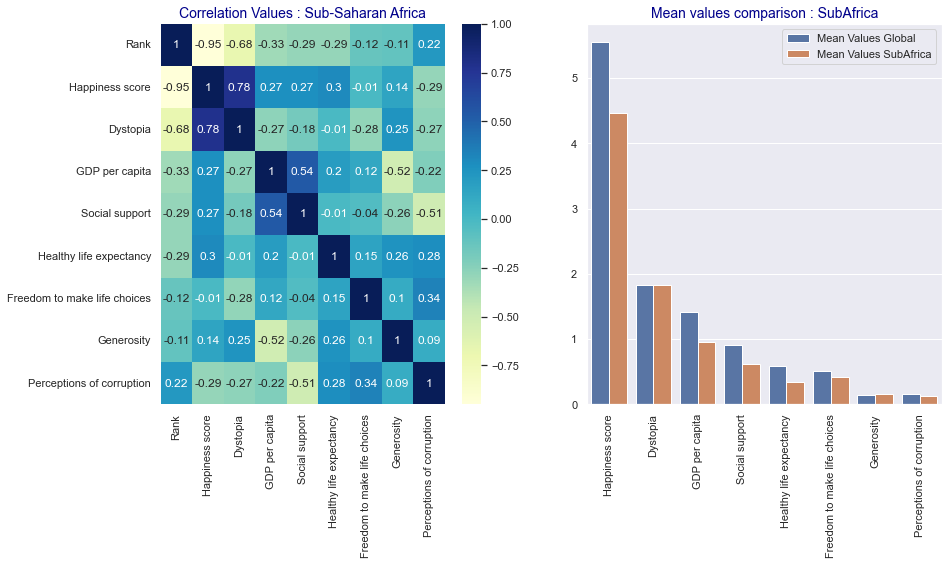

In [702]:
df_SubAfrica=df[df['Region']=='SSA']

mean_compare=pd.concat([mean_df_global,df_SubAfrica.drop('Rank',axis=1).mean(numeric_only=True)],axis=1)\
               .set_axis(['Mean Values Global','Mean Values SubAfrica'],axis=1).stack().reset_index()\
               .set_axis(['feature','splitter','values'],axis=1)

print('Number of Country:',df_SubAfrica.shape[0])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.heatmap(round(df_SubAfrica.corr(method='pearson'),2),annot=True,cmap='YlGnBu')
plt.title('Correlation Values : Sub-Saharan Africa',fontsize=14,color='darkblue')

plt.subplot(1,2,2)
sns.barplot(data=mean_compare, x='feature', y='values', hue='splitter')
plt.legend(title=None)
plt.xticks(rotation=90)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Mean values comparison : SubAfrica',fontsize=14,color='darkblue')
plt.show()


For Sub-Sahara African countries the most important factor that determines the happiness score is 'Dystopia', with mean score around the global average. From the viewpoint of the global MIF, the mean score of 'Social support', 'GDP per capita', and 'Healthy life expectancy' are lower than the global average. The other features have mean scores only slightly higher or even lower than the global average. It is thus reasonable that for Sub-Sahara African region the mean happiness score is lower than the global average. However, it is interesting to see that the mean generosity score in this region is higher than the global average given that the mean GDP-per-capita score in this region is below the global average.

Now let us turn our attention to European countries.

Number of Country: 41


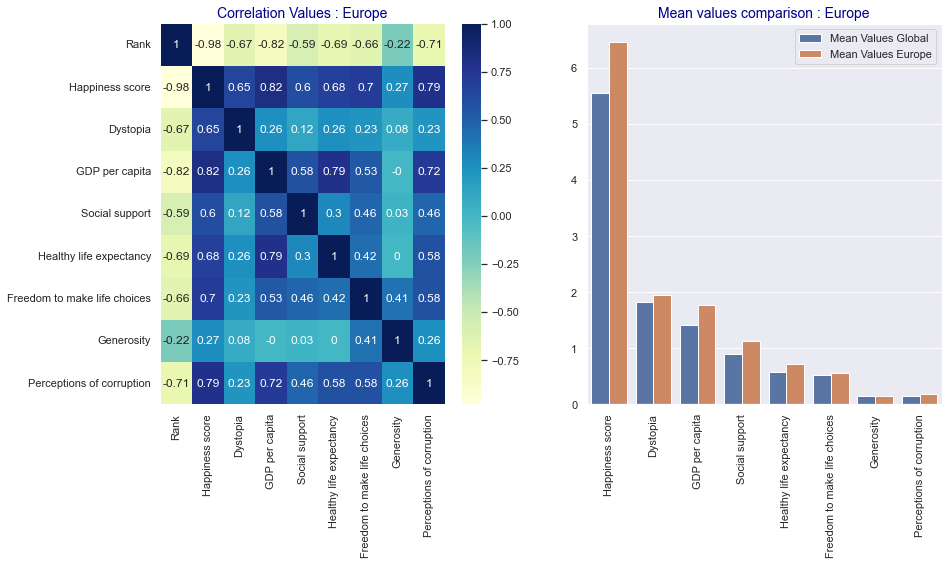

In [703]:
df_Europe=df[df['Region']=='Europe']

mean_compare=pd.concat([mean_df_global,df_Europe.drop('Rank',axis=1).mean(numeric_only=True)],axis=1)\
               .set_axis(['Mean Values Global','Mean Values Europe'],axis=1).stack().reset_index()\
               .set_axis(['feature','splitter','values'],axis=1)

print('Number of Country:',df_Europe.shape[0])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.heatmap(round(df_Europe.corr(method='pearson'),2),annot=True,cmap='YlGnBu')
plt.title('Correlation Values : Europe',fontsize=14,color='darkblue')

plt.subplot(1,2,2)
sns.barplot(data=mean_compare, x='feature', y='values', hue='splitter')
plt.legend(title=None)
plt.xticks(rotation=90)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Mean values comparison : Europe',fontsize=14,color='darkblue')
plt.show()


For European countries the three most important factors affecting the happiness score are : 1. GDP per capita, 2. Perceptions of corruption, and 3. Freedom to make life choices, with mean scores higher than the global average. Moreover, almost for all features, including the global MIF, the mean scores are above the global average except for 'Generosity' that is around the global average. No wonder that we can see a high mean happiness score for European countries as compared to the global average.

Finally, we will examine the dataset for American region.

Number of Country: 21


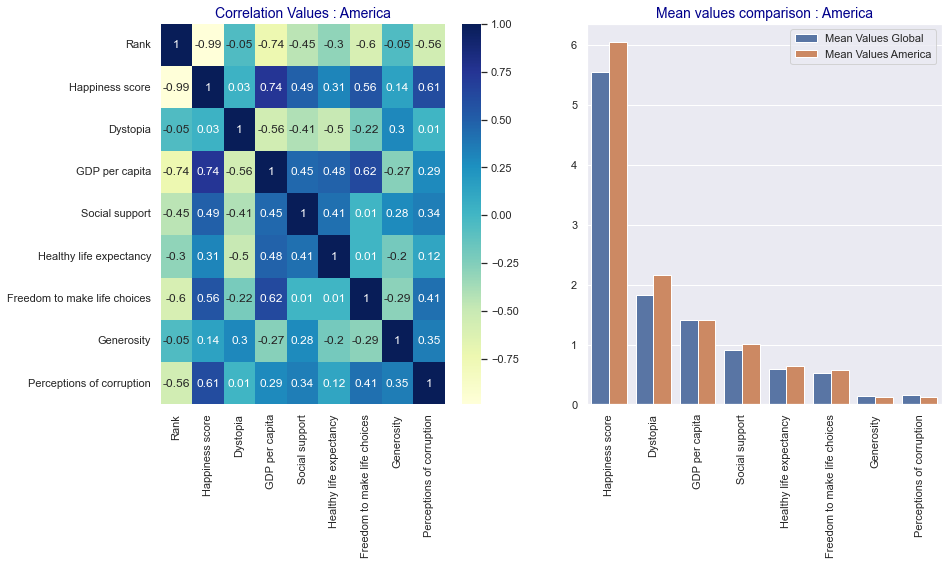

In [704]:
df_America=df[df['Region']=='America']

mean_compare=pd.concat([mean_df_global,df_America.drop('Rank',axis=1).mean(numeric_only=True)],axis=1)\
               .set_axis(['Mean Values Global','Mean Values America'],axis=1).stack().reset_index()\
               .set_axis(['feature','splitter','values'],axis=1)

print('Number of Country:',df_America.shape[0])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.heatmap(round(df_America.corr(method='pearson'),2),annot=True,cmap='YlGnBu')
plt.title('Correlation Values : America',fontsize=14,color='darkblue')

plt.subplot(1,2,2)
sns.barplot(data=mean_compare, x='feature', y='values', hue='splitter')
plt.legend(title=None)
plt.xticks(rotation=90)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Mean values comparison : America',fontsize=14,color='darkblue')
plt.show()


For American countries the most important features that may determine the happiness score are 'GDP per capita', 'Perceptions of corruption', and 'Freedom to make life choices'. The mean score of 'GDP per capita' is around global average, while the mean score for 'Perception of corruption' is slightly below global average and the mean score for 'Freedom to make life choices' is slightly higher than the global average. However the mean scores for the other features, including the global MIF, are higher or only slightly below the global average. These may return a high mean happines score for American region as compared to the global average.

### 4. Cluster Analysis

It is intriguing to see whether each country in our dataset can be grouped into another classification other than regionally. Therefore we will employ KMeans module to break the countries into several cluster. Let us begin by normalizing the numerical features of our dataset and choosing the best number of clustering.

In [705]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

col_num=df.drop(['Rank','Country','Region'],axis=1).columns.to_list()
MMS=MinMaxScaler()
df_norm=df.copy()
df_norm[col_num]=MMS.fit_transform(df_norm[col_num])

inertias=[]
for N in range(1,7):
    cluster_model=KMeans(n_clusters=N,random_state=0)
    labels=cluster_model.fit_predict(df_norm.drop(['Rank','Country','Region'],axis=1))
    inertias.append(cluster_model.inertia_)


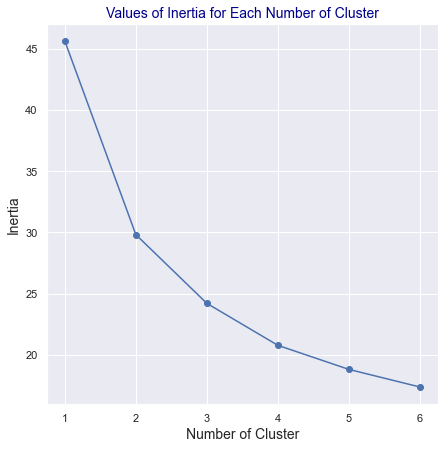

In [706]:
plt.figure(figsize=(7,7))
plt.plot(np.arange(1,7,1),inertias,marker='o')
plt.title('Values of Inertia for Each Number of Cluster',fontsize=14,color='darkblue')
plt.ylabel('Inertia',fontsize=14)
plt.xlabel('Number of Cluster',fontsize=14)
plt.show()    

Based on the above figure we will group the countries in our dataset into four clusters. Next, let us observe the mean values of each feature in each cluster of our dataset.

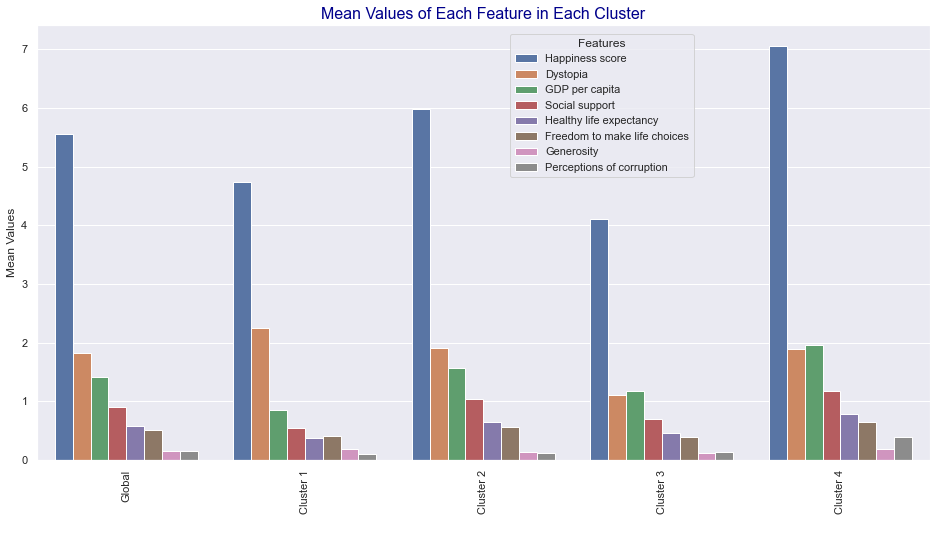

In [707]:
cluster_model=KMeans(n_clusters=4,random_state=0)
labels=cluster_model.fit_predict(X)
df['Cluster']=pd.DataFrame(labels)
df['Cluster']=df['Cluster'].map({0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4'})
mean_df_cluster=df.drop('Rank',axis=1).groupby('Cluster').mean(numeric_only=True)
mean_df_cluster.loc['Global',:]=df.drop('Rank',axis=1).mean(numeric_only=True)
mean_df_cluster=mean_df_cluster.reindex(['Global','Cluster 1','Cluster 2','Cluster 3','Cluster 4']).stack().reset_index()\
                               .set_axis(['Cluster','X','Y'],axis=1)



plt.figure(figsize=(16,8))
sns.barplot(data=mean_df_cluster,x='Cluster',y='Y',hue='X')
plt.title('Mean Values of Each Feature in Each Cluster',color='darkblue',fontsize=16)
plt.xlabel(' ')
plt.ylabel('Mean Values')
plt.xticks(rotation=90)

plt.legend(title='Features',loc=(0.53,0.65))
plt.show()


From the above figure, we can see that, based on the mean happiness score, Cluster 4 > Cluster 2 > Cluster 1 > Cluster 3. It can also be seen that Cluster 4 has the highest mean value of GDP per capita, while Cluster 1 has the highest mean value of Dystopia. On the other hand, between Cluster 2 and Cluster 3, it is clear that Cluster 2 has higher mean value for almost all features except for Generosity and Perception of Corruption. The global average values for all features are also shown in the figure as a comparison.

Now, let us see the regional member distribution of each cluster.

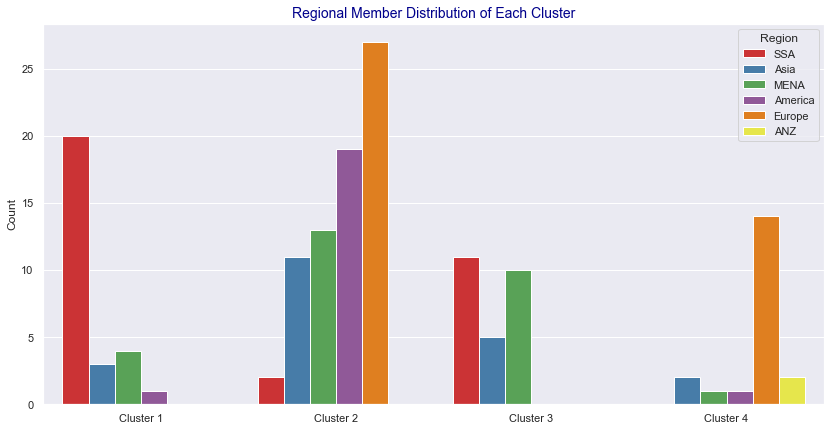

In [708]:
plt.figure(figsize=(14,7))
ax=sns.countplot(data=df.sort_values(by='Cluster'), x='Cluster', hue='Region',palette='Set1')
plt.xlabel(' ')
plt.ylabel('Count')
plt.title('Regional Member Distribution of Each Cluster',fontsize=14,color='darkblue')
plt.show()

We can see that Cluster 1 and Cluster 3 are dominated by countries from Sub-Sahara African along with Middle East and North African region. This explain the relatively low mean happiness score of Cluster 1 and Cluster 3 in the previous figure. Meanwhile, Cluster 2 and Cluster 4 are dominated by by European countries, which also explains the relatively high mean happiness score for Cluster 2 and Cluster 4 in the previous figure. Nevertheless, the main point here is, each cluster is a combination of countries from different region of the world.

## Conclusion

Globally to the world in 2022, the most important features (MIF) affecting the happiness score are the social support, GDP per capita, and healthy life expectancy. It means that a country with MIF scores higher than global average is more likely to have happiness score also higher than the global average. From the project, it is also revealed that every region in the world has its own main factors that can affect the happiness score. The cluster analysis carried out on the dataset also tells us that there are countries from different region of the world with similarities in their score of happiness features.